In [1]:
import os
from os import path
from datetime import datetime
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib.ticker import MaxNLocator

plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
import seaborn as sns

In [4]:
filename = path.join('..', 'data', 'raw', 'BOLETIM_DIARIO_CORONAVIRUS_SAP.xlsx')

assert path.exists(filename), f"Caminho para o arquivo não existe:\n{filename}"

In [5]:
frame = pd.read_excel(filename,
                   index_col="DATA",
                   parse_dates=['DATA'],
                   engine='openpyxl')

In [6]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 480 entries, 2020-07-03 to 2021-10-25
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   DESCARTADOS          480 non-null    int64
 1   EM INVESTIGACAO      480 non-null    int64
 2   CONFIRMADOS          480 non-null    int64
 3   EXAMINADOS           480 non-null    int64
 4   RECUPERADOS          480 non-null    int64
 5   ATIVOS               480 non-null    int64
 6   HOSPITAL             480 non-null    int64
 7   DOMICILIO            480 non-null    int64
 8   OBITOS               480 non-null    int64
 9   CONFIRMADOS_DIA      480 non-null    int64
 10  RECUPERADOS_DIA      480 non-null    int64
 11  DESCARTADOS_DIA      480 non-null    int64
 12  OBITOS_DIA           480 non-null    int64
 13  ATIVOS_DIA           480 non-null    int64
 14  EM_INVESTIGACAO_DIA  480 non-null    int64
dtypes: int64(15)
memory usage: 60.0 KB


In [7]:
# frame['NOVOS_CASOS'] = frame['CONFIRMADOS'].diff(periods=1)
# frame['RECUPERADOS_DIA'] = frame['RECUPERADOS'].diff(periods=1)
# frame['DESCARTADOS_DIA'] = frame['DESCARTADOS'].diff(periods=1)

frame.head()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,CONFIRMADOS_DIA,RECUPERADOS_DIA,DESCARTADOS_DIA,OBITOS_DIA,ATIVOS_DIA,EM_INVESTIGACAO_DIA
DATA,,,,,,,,,,,,,,,
2020-07-03,690,263,105,1058,63,38,3,35,4,0,0,0,0,0,0
2020-07-04,709,251,109,1069,65,43,3,40,4,4,2,19,0,5,-12
2020-07-05,711,252,110,1073,71,35,3,32,4,1,6,2,0,-8,1
2020-07-06,722,293,121,1136,79,38,2,36,4,11,8,11,0,3,41
2020-07-07,794,264,126,1184,85,37,4,33,4,5,6,72,0,-1,-29


In [8]:
frame.tail()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,CONFIRMADOS_DIA,RECUPERADOS_DIA,DESCARTADOS_DIA,OBITOS_DIA,ATIVOS_DIA,EM_INVESTIGACAO_DIA
DATA,,,,,,,,,,,,,,,
2021-10-21,16725,35,7018,23778,6816,50,2,48,152,9,1,24,0,8,-9
2021-10-22,16761,34,7022,23817,6816,53,2,51,153,4,0,36,1,3,-1
2021-10-23,16783,42,7026,23851,6819,54,2,52,153,4,3,22,0,1,8
2021-10-24,16783,42,7026,23851,6831,42,2,40,153,0,12,0,0,-12,0
2021-10-25,16792,42,7026,23860,6838,35,2,33,153,0,7,9,0,-7,0


In [9]:
frame['2021-03-23':]['CONFIRMADOS_DIA'].sum()

4973

In [10]:
df = frame.resample('W-MON').sum()

In [11]:
df.tail()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,CONFIRMADOS_DIA,RECUPERADOS_DIA,DESCARTADOS_DIA,OBITOS_DIA,ATIVOS_DIA,EM_INVESTIGACAO_DIA
DATA,,,,,,,,,,,,,,,
2021-09-27,113557,228,48186,161971,46808,319,21,298,1059,28,40,113,1,-13,-3
2021-10-04,114417,309,48402,163128,47057,281,15,266,1064,34,30,134,0,4,-1
2021-10-11,115368,181,48705,164254,47281,360,19,341,1064,41,34,124,0,7,-17
2021-10-18,116108,189,48873,165170,47561,248,21,227,1064,21,37,117,0,-16,15
2021-10-25,117203,279,49125,166607,47750,307,15,292,1068,35,28,150,1,6,19


In [12]:
import matplotlib.ticker as plticker



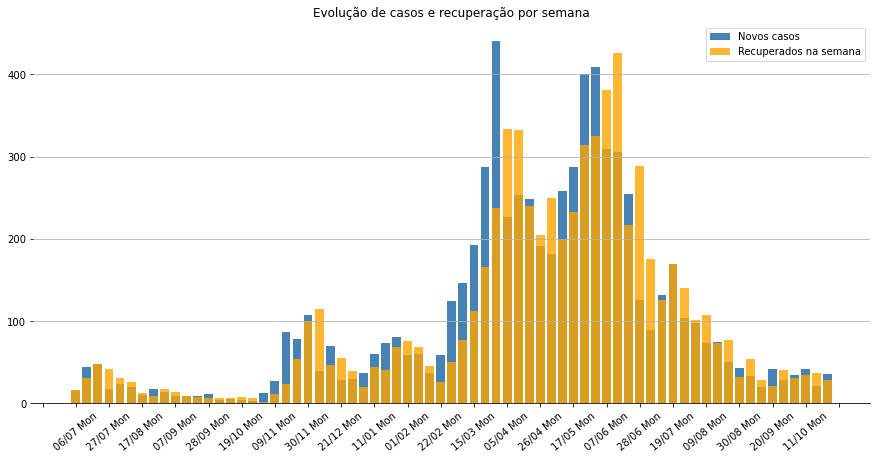

In [13]:
loc = plticker.MultipleLocator(base=3.0)

labels = [date.strftime("%d/%m %a") for date in df.index]

plt.figure(figsize=(15, 7))
ax = plt.subplot()
# plt.bar(labels, df['DESCARTADOS_DIA'], color='green', alpha=0.8, label="Casos descartados na semana")
plt.bar(labels, df['CONFIRMADOS_DIA'], color='steelblue', label='Novos casos')
plt.bar(labels, df['RECUPERADOS_DIA'], color='orange', alpha=0.8, label='Recuperados na semana')
ax.yaxis.grid(True)
ax.xaxis.set_major_locator(loc)
ax.set(title="Evolução de casos e recuperação por semana")
plt.legend()
plt.xticks(rotation=40)
sns.despine(left=True)

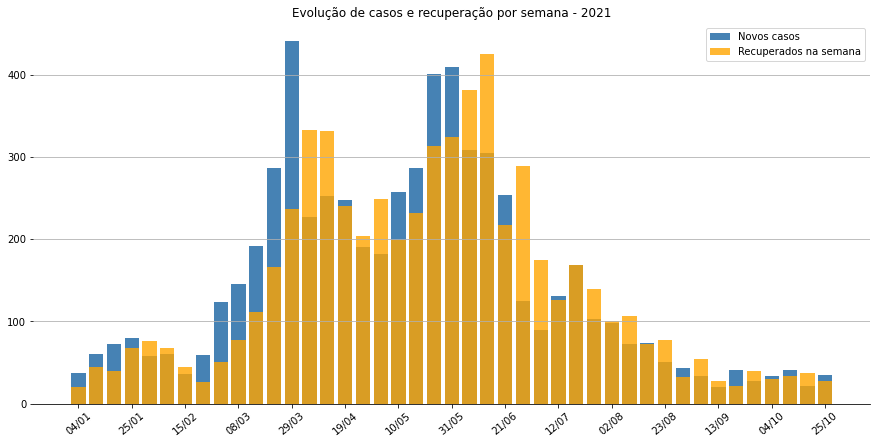

In [14]:
df = df['2021':]

labels = [date.strftime("%d/%m") for date in df.index]

plt.figure(figsize=(15, 7))
ax = plt.subplot()
# plt.bar(labels, df['DESCARTADOS_DIA'], color='green', alpha=0.8, label="Casos descartados na semana")
plt.bar(labels, df['CONFIRMADOS_DIA'], color='steelblue', label='Novos casos')
plt.bar(labels, df['RECUPERADOS_DIA'], color='orange', alpha=0.8, label='Recuperados na semana')
ax.yaxis.grid(True)
ax.xaxis.set_major_locator(loc)
ax.set(title="Evolução de casos e recuperação por semana - 2021")
plt.legend()
plt.xticks(rotation=40)
sns.despine(left=True)

In [15]:
today = datetime.now()

today.strftime("%d/%m/%y %a")

'26/10/21 Tue'

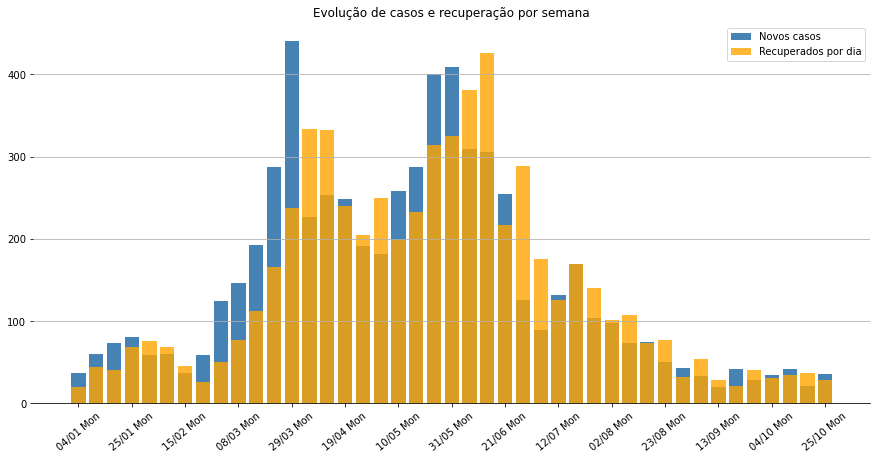

In [16]:
df2 = df['2020-11':]

loc = plticker.MultipleLocator(base=3.0)

labels = [date.strftime("%d/%m %a") for date in df2.index]

plt.figure(figsize=(15, 7))
ax = plt.subplot()
plt.bar(labels, df2['CONFIRMADOS_DIA'], color='steelblue', label='Novos casos')
plt.bar(labels, df2['RECUPERADOS_DIA'], color='orange', alpha=0.8, label='Recuperados por dia')
ax.yaxis.grid(True)
ax.xaxis.set_major_locator(loc)
ax.set(title="Evolução de casos e recuperação por semana")
plt.legend()
plt.xticks(rotation=40)
sns.despine(left=True)

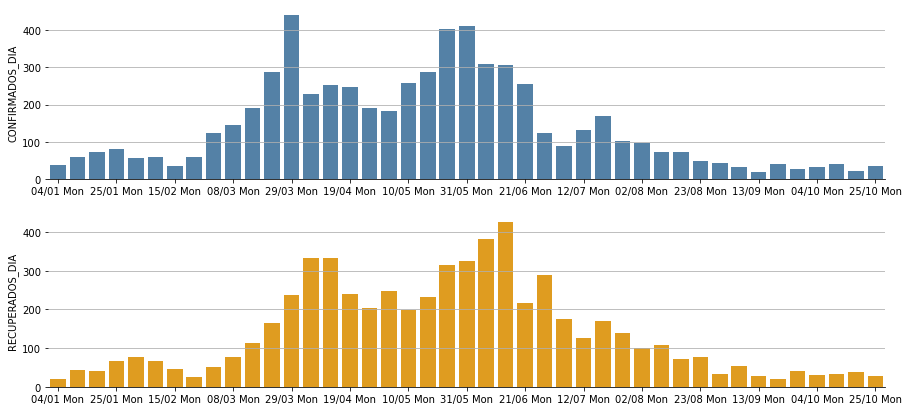

In [17]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 7), sharex=False)

loc = plticker.MultipleLocator(base=3.0)

labels = [date.strftime("%d/%m %a") for date in df2.index]

sns.barplot(x=labels,
            y=df2['CONFIRMADOS_DIA'],
            color='steelblue',            
            ax=ax1)
ax1.xaxis.set_major_locator(loc)

ax1.yaxis.grid(True)

sns.barplot(x=labels,
            y=df2['RECUPERADOS_DIA'],
            color='orange',            
            ax=ax2)
ax2.yaxis.grid(True)
ax2.xaxis.set_major_locator(loc)

sns.despine(left=True)

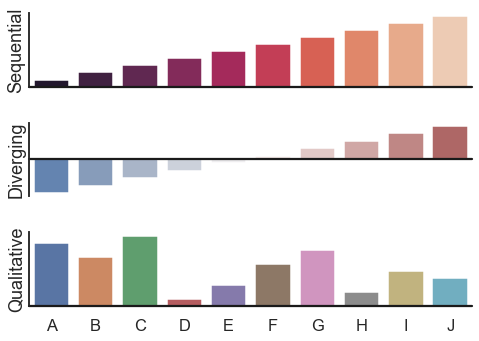

In [18]:
import numpy as np

sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)